* [Pima Indians Diabetes Data](#Pima_Indians_Diabetes_Data)
    * [导入必要的工具包](##导入必要的工具包)
    * [读取数据](##读取数据)
    * [数据探索](##数据探索)
        * [0值的分布](###0值的分布)
        * [标签的分布](###标签的分布)
        * [各特征的分布](###各特征的分布)
        * [特征之间的相关性](###特征之间的相关系)
    * [特征工程](##特征工程)
        * [用中值填补0值](###用中值填补0值)
        * [数据标准化](###数据标准化)
        * [保存特征处理结果](###保存特征处理结果)
    * [LogisticRegression](##Logistic回归)
    * [LogisticRegression + GridSearchCV](##LogisticRegression_+_GridSearchCV)
    * [模型保存](##保存模型)

# Pima Indians Diabetes Data 

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段:   
0列为pregnants(怀孕次数)；  
1列为Plasma_glucose_concentration(口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度)；   
2列为blood_pressure(舒张压,单位:mm Hg）  
3列为Triceps_skin_fold_thickness(三头肌皮褶厚度,单位：mm）  
4列为serum_insulin(餐后血清胰岛素,单位:mm）  
5列为BMI,体重指数（体重（公斤）/ 身高（米）^2）  
6列为Diabetes_pedigree_function(糖尿病家系作用)  
7列为Age(年龄)  
8列为Target(分类变量,0或1）
 
数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

p.s.: Kaggle也有一个Practice Fusion Diabetes Classification任务，可以试试:)
https://www.kaggle.com/c/pf2012-diabetes

## 导入必要的工具包

In [56]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 读取数据

In [57]:
train=pd.read_csv("./data/pima-indians-diabetes.csv")
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
print("Train shape: ",train.shape)

Train shape:  (768, 9)


## 数据探索

### 0值的分布

In [59]:
Nan_col_names=['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
print((train[Nan_col_names]==0).sum())            
            

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
dtype: int64


**第1、2、5列中0值比较少；第3、4列中的0值比较多**

### 标签的分布

Text(0,0.5,'number of occurrences')

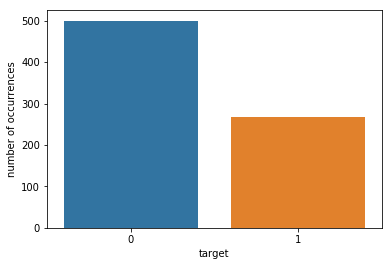

In [60]:
sns.countplot(train['Target'])
plt.xlabel('target')
plt.ylabel('number of occurrences')

### 各特征的分布

Text(0,0.5,'number of occurrences')

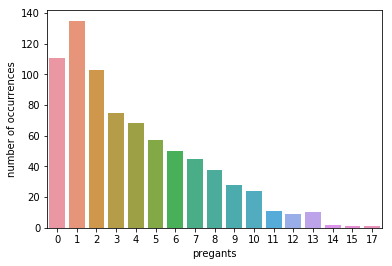

In [61]:
sns.countplot(train['pregnants'])
plt.xlabel('pregants')
plt.ylabel('number of occurrences')

### 特征之间的相关性

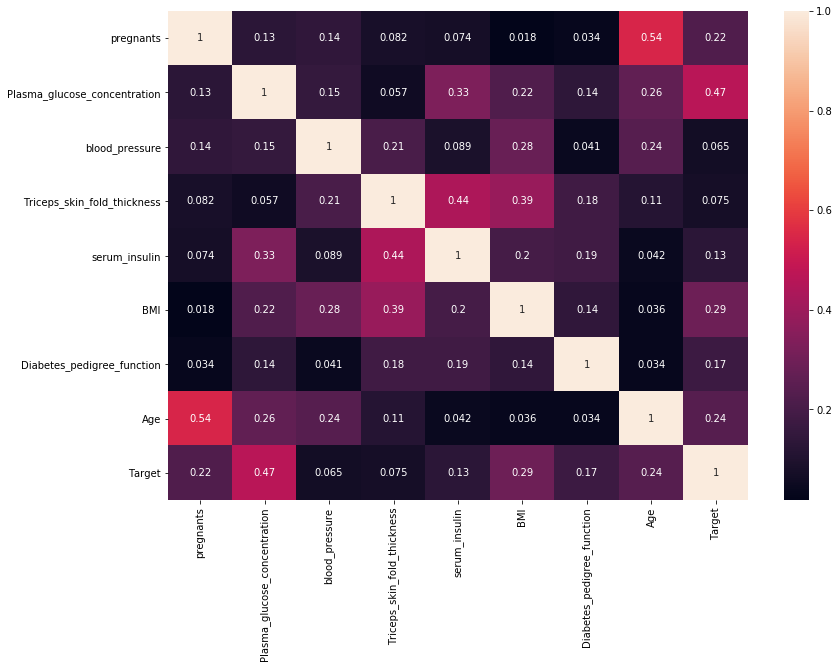

In [62]:
data_corr=train.corr().abs()
fig=plt.figure(figsize=(13,9))
sns.heatmap(data_corr,annot=True)

## 特征工程

### 用中值填补0值

In [63]:
train[Nan_col_names]=train[Nan_col_names].replace(0,np.NaN)
print(train.isnull().sum())

pregnants                         0
Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
Diabetes_pedigree_function        0
Age                               0
Target                            0
dtype: int64


#### 对于缺失值较多的特征，新增一个特征，表示这个特征是否缺失

In [64]:
#train['Triceps_skin_fold_thickness_Missing']=train['Triceps_skin_fold_thickness'].apply(lambda x: 1 if pd.isnull(x) else 0)
#train[['Triceps_skin_fold_thickness','Triceps_skin_fold_thickness_Missing']].head(10)

In [65]:
medians=train.median()
train=train.fillna(medians)
print(train.isnull().sum())
#print(medians)

pregnants                       0
Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
BMI                             0
Diabetes_pedigree_function      0
Age                             0
Target                          0
dtype: int64


### 数据标准化

In [66]:
from sklearn.preprocessing import StandardScaler

y_train=train['Target']
X_train=train.drop(['Target'],axis=1)

feat_names=X_train.columns

ss=StandardScaler()

X_train=ss.fit_transform(X_train)



### 保存特征处理结果

In [67]:
X_train=pd.DataFrame(columns=feat_names,data=X_train)
train=pd.concat([X_train,y_train],axis=1)
train.to_csv('./data/FE_pima-indians-diabetes.csv')
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


## Logistic回归

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV


In [69]:
lr=LogisticRegression()
loss=cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_log_loss')
#print('logloss of each fold is :',-loss)
print('cv logloss is :',np.mean(-loss))
accuracy=cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy')
print('cv accuracy is :',np.mean(accuracy))

cv logloss is : 0.47615970944434044
cv accuracy is : 0.7708683473389355


F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages

## LogisticRegression + GridSearchCV

In [70]:
penaltys=['l1','l2']
Cs=[0.01,0.1,1,10,100,1000]
parameters=dict(penalty=penaltys,C=Cs)


lr=LogisticRegression()
grid=GridSearchCV(lr,param_grid=parameters,cv=5,scoring='neg_log_loss')
grid.fit(X_train,y_train)


F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [71]:
print(-grid.best_score_)
print(grid.best_params_)

0.4760271975537597
{'C': 1, 'penalty': 'l1'}


## 保存模型

In [72]:
import pickle
pickle.dump(grid.best_estimator_,open('./model/lr_cv.pkl','wb'))